## Comment utiliser les outils de générations de textes pour réaliser un projet de data visualisation?

#### Pour ce projet nous allons utiliser un notebook python, et l'outil cody-ai intégré à l'IDE VSCode

In [1]:
# Install main librairies we would use
%pip install pandas matplotlib seaborn kaggle folium unittest
# Setup kaggle.json and fill it with access
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


ERROR: Could not find a version that satisfies the requirement unittest (from versions: none)
ERROR: No matching distribution found for unittest
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Prompt: Can you write a python code to import a dataset from kaggle?

import pandas as pd

# Download the dataset from Kaggle
!kaggle datasets download -d arinjaypathak/generative-ai-tweets

#Unzip the dataset
!unzip generative-ai-tweets.zip

# Import the dataset
df = pd.read_csv('GenerativeAI tweets.csv')
print(df.head())

 90%|██████████████████████████████████    | 5.00M/5.58M [00:00<00:00, 7.38MB/s]
100%|██████████████████████████████████████| 5.58M/5.58M [00:00<00:00, 6.57MB/s]
Archive:  generative-ai-tweets.zip
  inflating: GenerativeAI tweets.csv  
   Unnamed: 0                   Datetime             Tweet Id  \
0           0  2023-04-19 21:27:19+00:00  1648800467206672384   
1           1  2023-04-19 21:27:09+00:00  1648800425540476929   
2           2  2023-04-19 21:26:57+00:00  1648800376479715328   
3           3  2023-04-19 21:26:49+00:00  1648800341193027584   
4           4  2023-04-19 21:25:00+00:00  1648799883934203905   

                                                Text       Username  
0  From Studio Gangster to Synthetic Gangster 🎤.....     resembleai  
1  Took me some time to find this. I build this #...  devaanparbhoo  
2  Mind blowing next wave #generativeai  platform...        timreha  
3  Open Source Generative AI Image Specialist Sta...     VirtReview  
4  Are you an #HR leade

In [3]:
# Check the quality of the dataframe we got
print(df.shape)
print(df.head())
print(df.describe())
print(df.info())
print(df.columns)

(56221, 5)
   Unnamed: 0                   Datetime             Tweet Id  \
0           0  2023-04-19 21:27:19+00:00  1648800467206672384   
1           1  2023-04-19 21:27:09+00:00  1648800425540476929   
2           2  2023-04-19 21:26:57+00:00  1648800376479715328   
3           3  2023-04-19 21:26:49+00:00  1648800341193027584   
4           4  2023-04-19 21:25:00+00:00  1648799883934203905   

                                                Text       Username  
0  From Studio Gangster to Synthetic Gangster 🎤.....     resembleai  
1  Took me some time to find this. I build this #...  devaanparbhoo  
2  Mind blowing next wave #generativeai  platform...        timreha  
3  Open Source Generative AI Image Specialist Sta...     VirtReview  
4  Are you an #HR leader considering which future...      FrozeElle  
         Unnamed: 0      Tweet Id
count  56221.000000  5.622100e+04
mean   28110.000000  1.628960e+18
std    16229.749079  1.689126e+16
min        0.000000  1.517066e+18
25%    1

In [4]:
# Clean the dataframe
df = df.dropna() # Drop rows with missing values
df = df.drop_duplicates() # Drop duplicate rows
print(df.head())

   Unnamed: 0                   Datetime             Tweet Id  \
0           0  2023-04-19 21:27:19+00:00  1648800467206672384   
1           1  2023-04-19 21:27:09+00:00  1648800425540476929   
2           2  2023-04-19 21:26:57+00:00  1648800376479715328   
3           3  2023-04-19 21:26:49+00:00  1648800341193027584   
4           4  2023-04-19 21:25:00+00:00  1648799883934203905   

                                                Text       Username  
0  From Studio Gangster to Synthetic Gangster 🎤.....     resembleai  
1  Took me some time to find this. I build this #...  devaanparbhoo  
2  Mind blowing next wave #generativeai  platform...        timreha  
3  Open Source Generative AI Image Specialist Sta...     VirtReview  
4  Are you an #HR leader considering which future...      FrozeElle  


In [4]:
def test_dataframe_quality(df):

    columns_awaited = ['Unnamed: 0','Datetime','Tweet Id','Text','Username']
        
    result = {
        'is_empty': False,  # Initialize result dictionary with default values
        'missing_values': {},
        'missing_columns': []
    }
    
    # Check if the dataframe is empty
    if df.empty:
        result['is_empty'] = True
    
    # Identify missing values in each column
    missing_values = df.isnull().sum().to_dict()
    result['missing_values'] = missing_values
    
    # Identify missing columns
    missing_columns = [col for col in columns_awaited if col not in df.columns]
    result['missing_columns'] = missing_columns
    
    return result


/tmp/ipykernel_526/404632985.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_month = df.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()


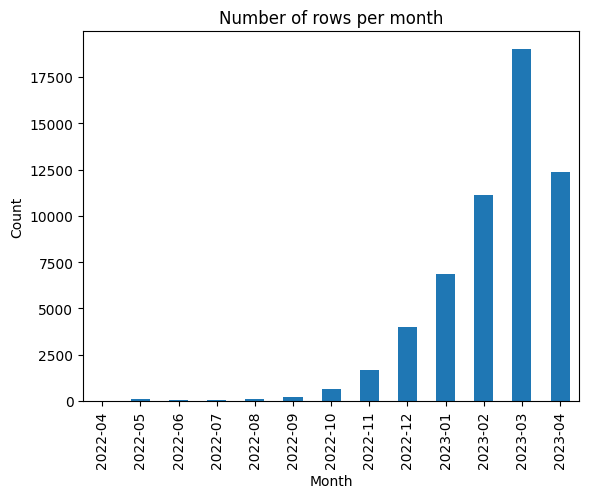

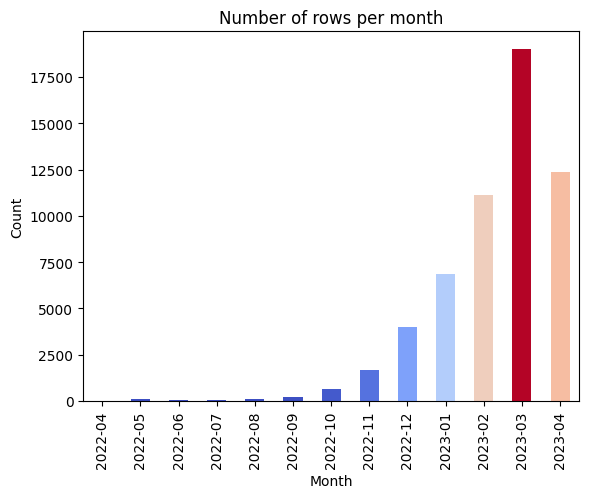

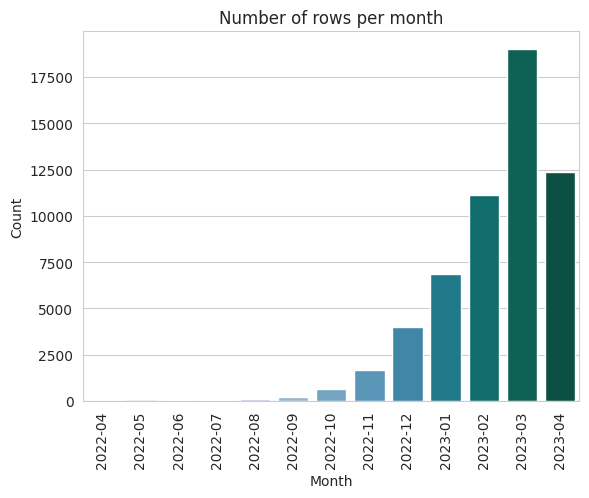

In [5]:
# Based on the column Datetime, create a plot with matplotlib to show the number of rows per date grouped by month
import matplotlib.pyplot as plt
# Group data by month and count rows
df['Datetime'] = pd.to_datetime(df['Datetime'])
df_month = df.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()
# Plot number of rows per month
df_month.plot(kind='bar')
plt.title('Number of rows per month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

#The same but with a color gradient
colors = plt.cm.coolwarm(df_month/df_month.max())
df_month.plot(kind='bar', color=colors)
plt.title('Number of rows per month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

#The same using seaborn with a x labels vertical rotation
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x=df_month.index, y=df_month, palette="PuBuGn")
ax.set_title('Number of rows per month')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


/tmp/ipykernel_526/1730403295.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_gp = df_gp.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()


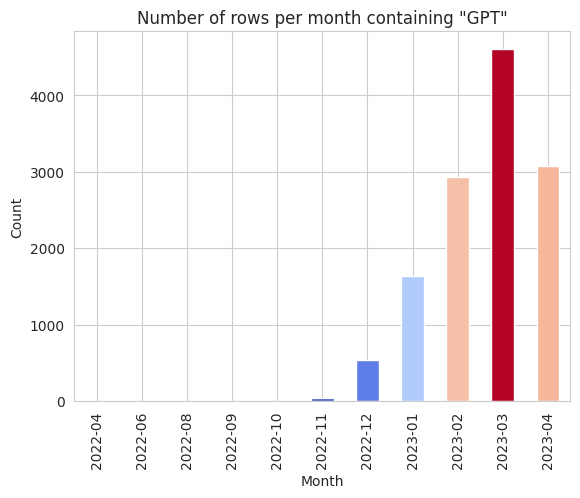

/tmp/ipykernel_526/1730403295.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_danger = df_danger.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()


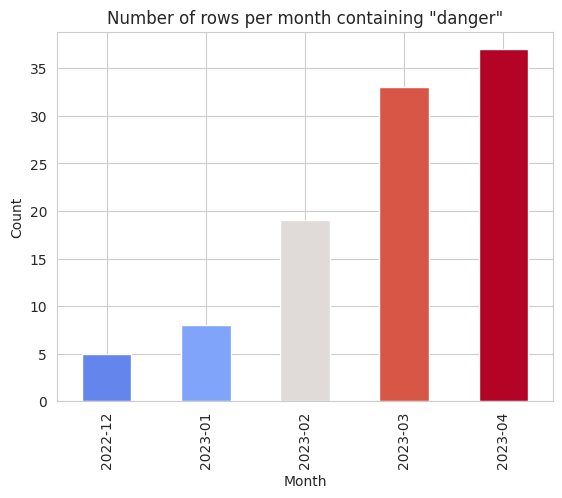

/tmp/ipykernel_526/1730403295.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_danger = df_danger.groupby(df_danger['Datetime'].dt.to_period('M'))['Datetime'].count()


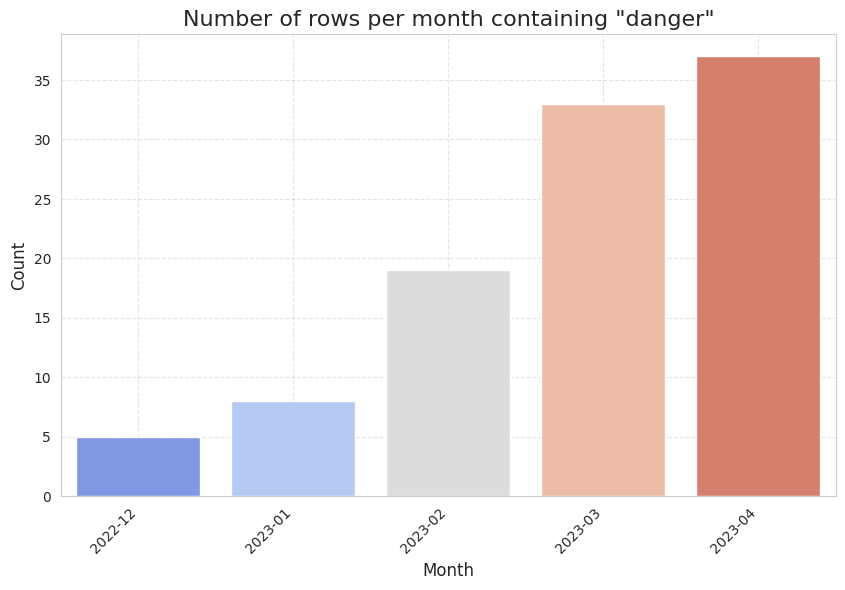

/tmp/ipykernel_526/1730403295.py:58: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_danger = df_danger.groupby(df_danger['Datetime'].dt.to_period('M'))['Datetime'].count()


ValueError: Unknown format code 'd' for object of type 'float'

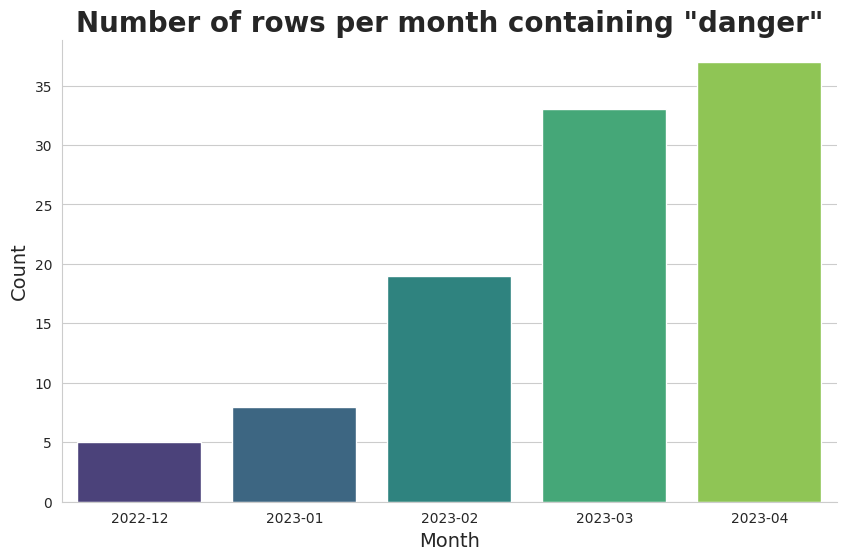

In [9]:
# Based on the column Text and Datetime, create a plot to show the number of rows containing the text "GPT" per date grouped by month
df['Month'] = df['Datetime'].dt.month
df_gp = df[df['Text'].str.contains("GPT")]
df_gp = df_gp.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()
colors = plt.cm.coolwarm(df_gp/df_gp.max())
df_gp.plot(kind='bar', color=colors)
plt.title('Number of rows per month containing "GPT"')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

# The same with the word "danger" instead of "GPT"
df_danger = df[df['Text'].str.contains("danger")]
df_danger = df_danger.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()
colors = plt.cm.coolwarm(df_danger/df_danger.max())
df_danger.plot(kind='bar', color=colors)
plt.title('Number of rows per month containing "danger"')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

# Masterpieced
# Filter rows containing 'danger'
df_danger = df[df['Text'].str.contains("danger")]

# Group by month and count occurrences
df_danger = df_danger.groupby(df_danger['Datetime'].dt.to_period('M'))['Datetime'].count()

# Sort the values by index
df_danger.sort_index(inplace=True)

# Create color mapping
colors = sns.color_palette('coolwarm', len(df_danger))

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_danger.index, y=df_danger.values, palette=colors)
ax.set_title('Number of rows per month containing "danger"', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()

#More creative
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows containing 'danger'
df_danger = df[df['Text'].str.contains("danger")]

# Group by month and count occurrences
df_danger = df_danger.groupby(df_danger['Datetime'].dt.to_period('M'))['Datetime'].count()

# Sort the values by index
df_danger.sort_index(inplace=True)

# Generate a custom color gradient
colors = sns.color_palette("viridis", len(df_danger))
custom_cmap = sns.color_palette(colors).as_hex()

# Create a bar plot with gradient colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_danger.index, y=df_danger.values, palette=custom_cmap)
ax.set_title('Number of rows per month containing "danger"', fontsize=20, fontweight='bold')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the chart with a background pattern
sns.set_style("whitegrid")
ax.grid(False)
ax.set_facecolor('#f7f7f7')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Show the chart
plt.tight_layout()
sns.despine()
plt.show()




/tmp/ipykernel_526/2210726898.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_gp = df_gp.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()
/tmp/ipykernel_526/2210726898.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(gradient)


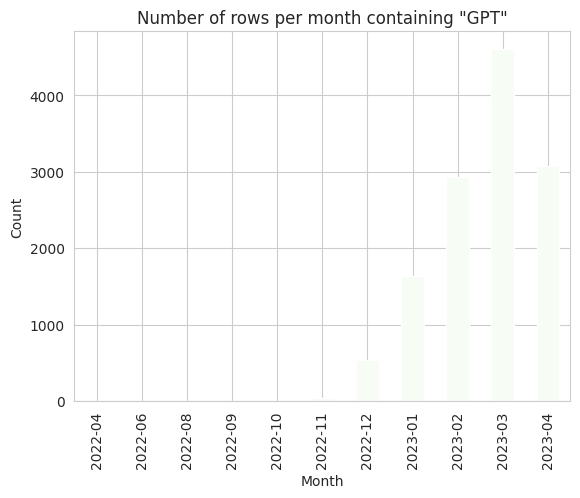

In [13]:
# Create a function to change the color of a plot
import matplotlib.pyplot as plt
import random

def random_gradient_color():
    # List of gradients
    gradients = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

    # Select a random gradient from the list
    gradient = random.choice(gradients)

    # Create a colormap using the selected gradient
    cmap = plt.cm.get_cmap(gradient)
    return cmap


df['Month'] = df['Datetime'].dt.month
df_gp = df[df['Text'].str.contains("GPT")]
df_gp = df_gp.groupby(df['Datetime'].dt.to_period('M'))['Datetime'].count()
df_gp.plot(kind='bar', cmap = random_gradient_color())
plt.title('Number of rows per month containing "GPT"')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

In [15]:
import pandas as pd

# Download the dataset from Kaggle
!kaggle datasets download -d nelgiriyewithana/countries-of-the-world-2023

#Unzip the dataset
!unzip countries-of-the-world-2023.zip

# Import the dataset
df_country = pd.read_csv('world-data-2023.csv')
print(df.head())

  0%|                                               | 0.00/23.5k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 23.5k/23.5k [00:00<00:00, 1.30MB/s]
Archive:  countries-of-the-world-2023.zip
  inflating: world-data-2023.csv     
   Unnamed: 0                  Datetime             Tweet Id  \
0           0 2023-04-19 21:27:19+00:00  1648800467206672384   
1           1 2023-04-19 21:27:09+00:00  1648800425540476929   
2           2 2023-04-19 21:26:57+00:00  1648800376479715328   
3           3 2023-04-19 21:26:49+00:00  1648800341193027584   
4           4 2023-04-19 21:25:00+00:00  1648799883934203905   

                                                Text       Username  Month  
0  From Studio Gangster to Synthetic Gangster 🎤.....     resembleai      4  
1  Took me some time to find this. I build this #...  devaanparbhoo      4  
2  Mind blowing next wave #generativeai  platform...        timreha      4  
3  Open Source Generative AI Image Specialist Sta...     VirtRevi

In [16]:
# Convert string columns with commas to float
string_columns = ['Co2-Emissions', 'Land Area(Km2)']  # Specify the column names that contain strings with commas

for col in string_columns:
    df_country[col] = df_country[col].str.replace(',', '').astype(float)

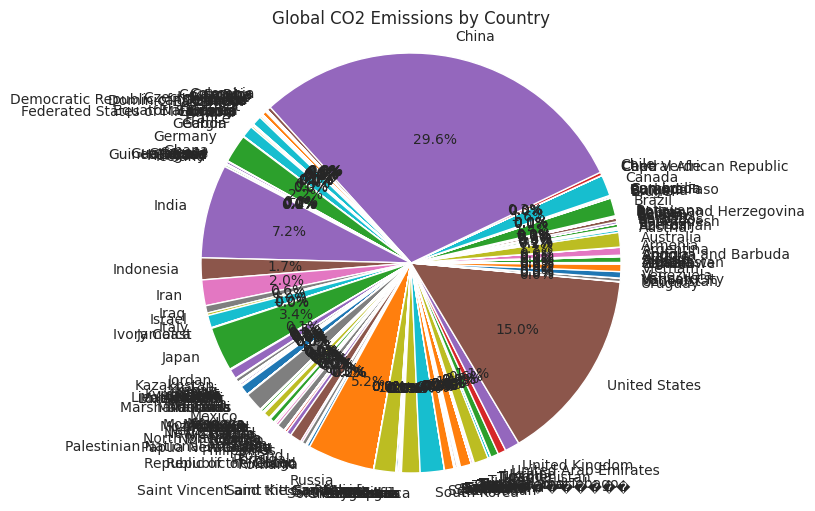

In [17]:
import matplotlib.pyplot as plt

# Grouping the dataframe by 'Country' and summing the 'CO2_Emissions' for each country
country_emissions = df_country.groupby('Country')['Co2-Emissions'].sum()

# Plotting a pie chart of global emissions per country
plt.figure(figsize=(10, 6))
plt.pie(country_emissions, labels=country_emissions.index, autopct='%1.1f%%')
plt.title('Global CO2 Emissions by Country')
plt.axis('equal')

# Displaying the pie chart
plt.show()


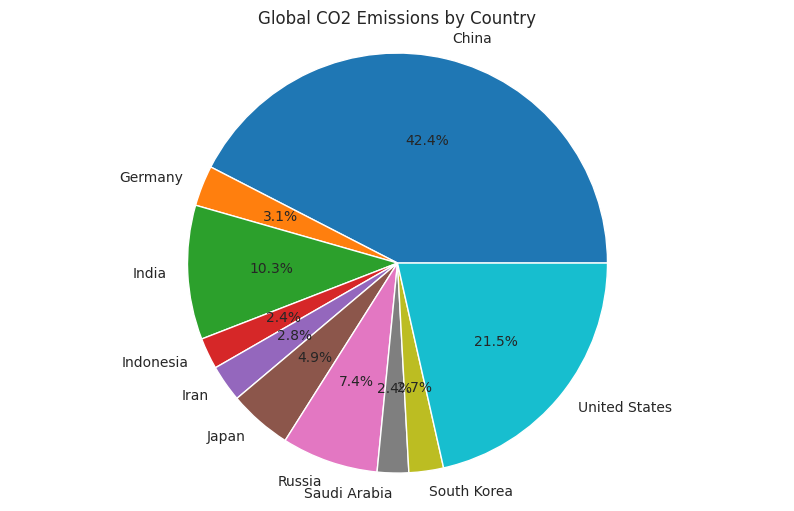

In [18]:
# Grouping the dataframe by 'Country' and summing the 'CO2_Emissions' for each country
df_country_limited = df_country.sort_values(by='Co2-Emissions', ascending=False).head(10)
country_emissions = df_country_limited.groupby('Country')['Co2-Emissions'].sum()

# Plotting a pie chart of global emissions per country
plt.figure(figsize=(10, 6))
plt.pie(country_emissions, labels=country_emissions.index, autopct='%1.1f%%')
plt.title('Global CO2 Emissions by Country')
plt.axis('equal')

# Displaying the pie chart
plt.show()

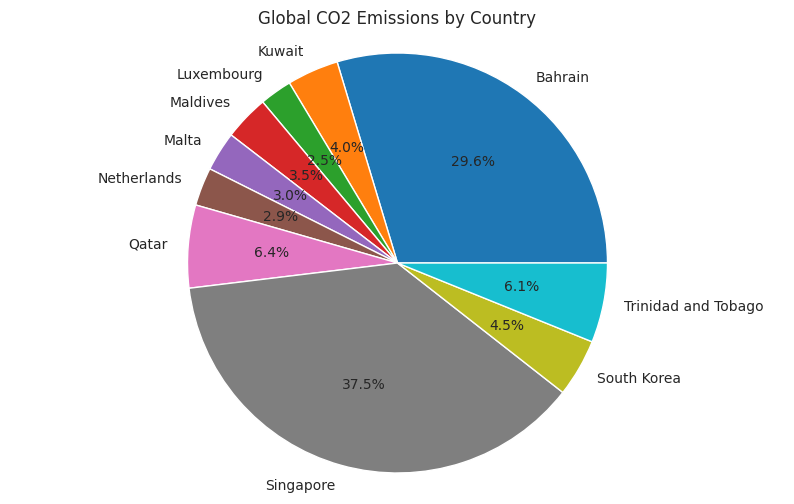

In [19]:
# Grouping the dataframe by 'Country' and summing the 'CO2_Emissions' for each country
df_country["Co2_ratio"] = df_country["Co2-Emissions"] / df_country['Land Area(Km2)']
df_country_limited = df_country.sort_values(by='Co2_ratio', ascending=False).head(10)
country_emissions = df_country_limited.groupby('Country')['Co2_ratio'].sum()

# Plotting a pie chart of global emissions per country
plt.figure(figsize=(10, 6))
plt.pie(country_emissions, labels=country_emissions.index, autopct='%1.1f%%')
plt.title('Global CO2 Emissions by Country')
plt.axis('equal')

# Displaying the pie chart
plt.show()

In [20]:
import folium
import pandas as pd

# Create a Map object centered at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add a choropleth layer to the map using the values from the dataset
folium.Choropleth(
    geo_data='world.json',  # Replace 'world.json' with the path to the GeoJSON file for world countries
    data=df_country,
    columns=['Country', 'Co2-Emissions'],  # Replace 'Country' and 'Value' with your column names in the dataset
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)

# Display the map
m.save('map.html')


In [21]:
print(df_country.columns)

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude', 'Co2_ratio'],
      dtype='object')
